## 由于正态分布非常重要，我们需要检查收集的数据是否正态。

这里，我们将演示Q-Q plot ，以检查数据偏斜的正态性。Q代表分位数，因此，Q-Q图代表分位数图。确定正态性的方法，还有一些统计检验，比如Kolmogorov–Smirnov test and the Shapiro–Wilk test。这次的范围仅限于Q-Q图

#### 简要说明

Q-Q图是分位数图，但分位数是什么？当对整个数据进行排序时，第50个分位数表示50%的数据低于该点，50%的数据高于该点，这个点就是中间点。

当我们说第一个分位数时，就是只有1%的数据低于该分位数，99%的数据高于该分位数。因此第25和第75分位数点也称为四分位数。数据集有三个四分位数。

Q1=第一个四分位数=第25个分位数

Q2=第二个四分位数=第50个分位数=中位数

Q3=第三个四分位数=第75个分位数

分位数有时被称为百分位数。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
np.random.seed(100)

In [11]:
# creating a normal distribution datapoints using numpy with mean 0 and standard deviation 1

np_normal = pd.Series(np.random.normal(0, 1, 200))

0      0.604424
1     -0.907030
2      0.592023
3     -0.437064
4      0.101776
         ...   
195    0.189719
196   -2.048672
197    0.783786
198   -0.232985
199   -1.184411
Length: 200, dtype: float64


In [3]:
sns.set_style("whitegrid") 

In [4]:
np_normal.mean()

-0.08720600885466072

In [5]:
np_normal.std()

1.0206956807184258

In [8]:
np.quantile(np_normal,[0.25,0.5,0.75,0.99])

array([-0.77424732, -0.09201119,  0.68769792,  2.07482236])

现在我们试下画下正态分布的数据集。

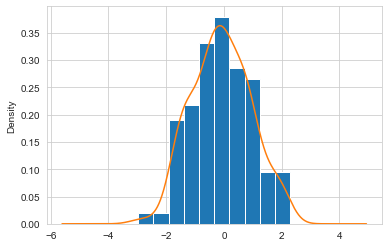

In [9]:
# Plotting the normal distribution datapoints np_normal

fig, ax = plt.subplots()
np_normal.plot.hist(ax=ax,density=True)
np_normal.plot.kde(ax=ax)
plt.show()

将该数据集与具有理论正态分布进行比较

C:\Users\zzh19\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


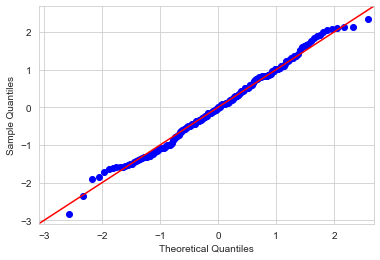

In [10]:
##QQ plot of normal distribution vs theoritical normal distribution

sm.qqplot(np_normal,line='45',fit=True,dist=stats.norm)
plt.show()

样本分位数与理论分位数非常相似（即蓝点靠近红线）。在这张图表的上下限有一些异常值会产生一些噪音，但这不是一个大问题，因为样本分布的大部分已经与理论分布非常吻合。

### uniform distribution 平均分布

现在，让我们模拟-5到5之间的2000个均匀分布点，并将该数据集与具有相同均值和方差的正态分布进行比较。我们希望得到一个与45度线非常不同的Q-Q图，因为这两种分布非常不同。

In [9]:
#creating a uniform distribution datapoints using numpy between range -5 to 5

np_uniform = pd.Series(np.random.uniform(-5, 5, 2000))

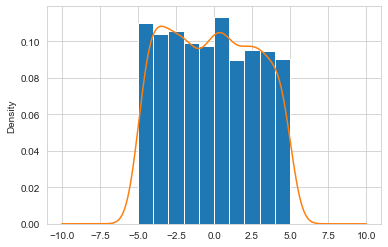

In [10]:
#plotting the uniform distribution - np_uniform

fig, ax = plt.subplots()
np_uniform.plot.hist(ax=ax,density=True)
np_uniform.plot.kde(ax=ax)
plt.show()

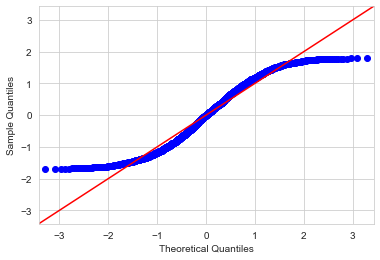

In [11]:
##QQ plot of uniform distribution with Normal distribution

sm.qqplot(np_uniform,line='45',fit=True,dist=stats.norm)
plt.show()

fit=True参数会根据最大可能性将正态分布拟合到数据集。我们可以看到，样本分位数与理论分位数有很大不同，因为蓝点离红线非常远，红线是45度线。

### Exponential Distribution 指数分布
如果我们用理论正态分布绘制一个指数分布的变量，图表如下所示。

In [12]:
#Creating exponentional datapoints

np_exp = pd.Series(np.random.exponential(scale=1.0, size=200))

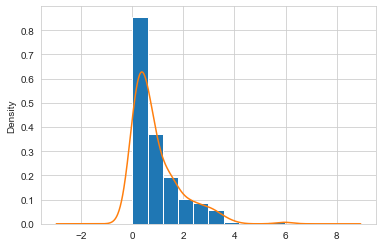

In [13]:
#Plotting Exponential datapoints

fig, ax = plt.subplots()
np_exp.plot.hist(ax=ax,density=True)
np_exp.plot.kde(ax=ax)
plt.show()

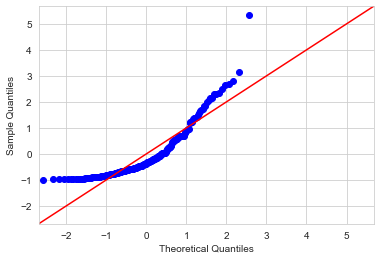

In [14]:
#QQ plot for exponential distribution with normal distribution

sm.qqplot(np_exp,fit=True,line='45',dist=stats.norm)
plt.show()

如果我们用理论平均分布绘制一个指数分布的变量，图表如下所示。

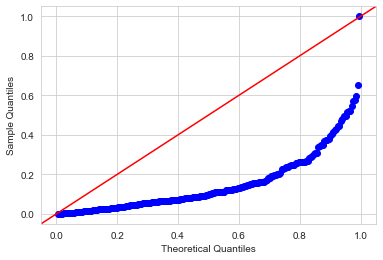

In [15]:
#QQ plot for exponential distribution with uniform distribution
sm.qqplot(np_exp,fit=True,line='45',dist=stats.uniform)
plt.show()

如果我们用理论指数分布绘制一个指数分布的变量，图表如下所示。

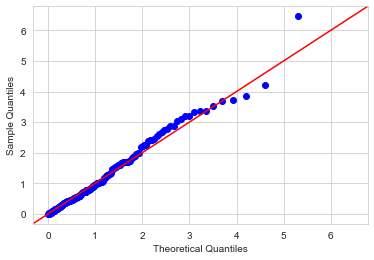

In [16]:
#QQ plot for exponential distribution with exponential distribution

sm.qqplot(np_exp,fit=True,line='45',dist=stats.expon)
plt.show()

### Q-Q plots and skewness of data
Q-Q图和数据偏斜

现在让我们看看如何使用Q-Q图来确定数据的偏度

如果用户看到绘图的左侧偏离直线，则显示为左偏。当绘图向右侧偏离时，它是右偏的。

让我们使用脚本库中的skewnorm创建一个左偏分布。

In [17]:
from scipy.stats import skewnorm
import matplotlib.pyplot as plt

skewness = -5 #Negative values are left skewed, positive values are right skewed.

random = skewnorm.rvs(a = skewness,loc=1000, size=50000)  #Skewnorm function

random = random - min(random)      #Shift the set so the minimum value is equal to zero.
random = random / max(random)      #Standadize all the vlues between 0 and 1. 
random = random * 50000  
random = pd.Series(random)

The distribution would look like below:

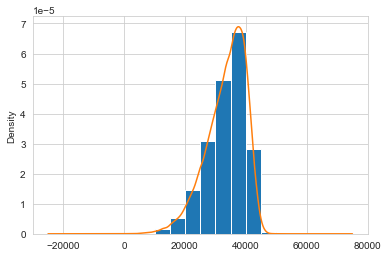

In [18]:
fig, ax = plt.subplots()
random.plot.hist(ax=ax,density=True)
random.plot.kde(ax=ax)
plt.show()

When we plot Q-Q plot, we should observe deviation on the left side

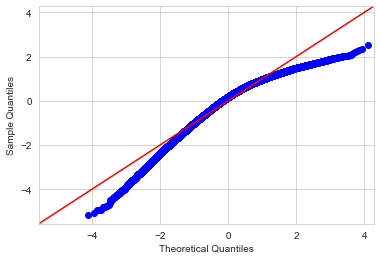

In [19]:
sm.qqplot(random,fit=True,line='45') 
plt.show()

使用脚本库中的skewnorm创建一个右偏分布。

In [20]:
# Lets create a right skewed data

from scipy.stats import skewnorm
import matplotlib.pyplot as plt

skewness = 16  #Negative values are left skewed, positive values are right skewed.

random = skewnorm.rvs(a = skewness,loc=1000, size=50000)  #Skewnorm function

random = random - min(random)      #Shift the set so the minimum value is equal to zero.
random = random / max(random)      #Standadize all the vlues between 0 and 1. 
random = random * 50000  
random = pd.Series(random)

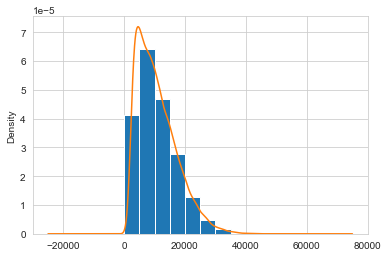

In [21]:
fig, ax = plt.subplots()
random.plot.hist(ax=ax,density=True)
random.plot.kde(ax=ax)
plt.show()

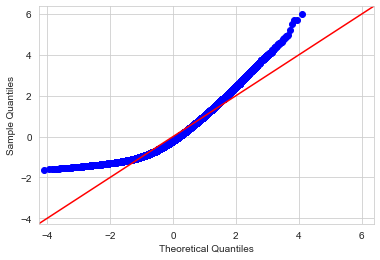

In [22]:
#QQ plot for right skewed distribution with normal distribution

sm.qqplot(random,fit=True,line='45')
plt.show()

### 总结：

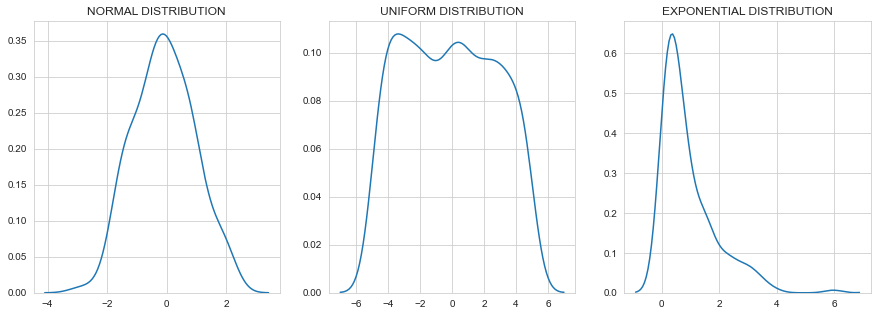

In [23]:
sns.set_style("whitegrid") 
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.kdeplot(np_normal)
plt.title("NORMAL DISTRIBUTION")
plt.subplot(1,3,2)
sns.kdeplot(np_uniform)
plt.title("UNIFORM DISTRIBUTION")
plt.subplot(1,3,3)
sns.kdeplot(np_exp)
plt.title("EXPONENTIAL DISTRIBUTION")
plt.show()